In [2]:
import pandas as pd
import pyarrow.parquet as pq
import os

In [2]:
# Especifica la ruta de la carpeta que contiene los archivos .parquet particionados
ruta_carpeta_parquet = '../datasets/parquets/metadatos Google'

# Lista para almacenar DataFrames de cada partición
dataframes = []

# Itera sobre los archivos .parquet en la carpeta
for root, dirs, files in os.walk(ruta_carpeta_parquet):
    for file in files:
        if file.endswith('.parquet'):
            # Construye la ruta completa del archivo
            ruta_completa = os.path.join(root, file)
            
            # Lee el archivo .parquet y agrega el DataFrame a la lista
            df_particion = pd.read_parquet(ruta_completa)
            dataframes.append(df_particion)

# Concatena todos los DataFrames en uno solo
df_google = pd.concat(dataframes, ignore_index=True)

In [3]:
# Explode the "categories" column
df_explode = df_google.explode('category')

# Reset the index if needed
df_explode.reset_index(drop=True, inplace=True)

In [4]:
categorias = pd.read_csv('..\datasets\csv\G_beauty_categories.csv')

In [5]:
# Extract unique values from the "category" column in categorias DataFrame
valid_categories = categorias['category']

# Filter df_google based on valid categories
#df_google = df_google[df_google['category'].isin(valid_categories)]
df_explode = df_explode[df_explode['category'].isin(valid_categories)] 
df_google=  df_google[df_google['gmap_id'].isin(df_explode['gmap_id'].unique())]  
# Reset the index if needed
df_google.reset_index(drop=True, inplace=True)



In [6]:
df_google.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,State
0,Polished Nail Salon & Spa,"Polished Nail Salon & Spa, 1330 Hickman Rd, Wa...",0x87ec238afdd8837b:0x2f43f2b12142bff5,None,41.614198,-93.847269,"[Nail salon, Waxing hair removal service]",4.0,86,None,"[[Thursday, 9AM–8PM], [Friday, 9AM–8PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 8PM,"[0x87ec2481df68e107:0x2978d64e14ca8313, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...,IA
1,Lena’s Beauty Nails Lashes Brows,"Lena’s Beauty Nails Lashes Brows, 657 NE Ventu...",0x87ec2481df6626b5:0xff5627745308ec2b,None,41.616310,-93.858345,[Beauty salon],4.2,128,None,"[[Thursday, 9AM–7PM], [Friday, 9AM–7PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 7PM,"[0x87ec20ce836cac57:0x83bd66577e9a7a32, 0x87ee...",https://www.google.com/maps/place//data=!4m2!3...,IA
2,Angel-A Massage,"Angel-A Massage, 5329 Dewey Dr, Fair Oaks, CA ...",0x809adef58ae560bd:0x83412889e022ff70,None,38.662630,-121.308639,"[Massage spa, Chiropractor, Massage, Massage t...",4.3,6,None,"[[Thursday, 9:30AM–9:30PM], [Friday, 9:30AM–9:...",None,Open ⋅ Closes 9:30PM,"[0x809adee9ac6f1bd7:0xe2e56d16919b9b8d, 0x809a...",https://www.google.com/maps/place//data=!4m2!3...,CA
3,Elite Massage,"Elite Massage, 8121 Madison Ave, Fair Oaks, CA...",0x809ae0a7ce91433b:0xe4b44fbb8c35ba57,None,38.664915,-121.260192,[Massage therapist],5.0,1,None,None,None,None,"[0x809ade27605defc1:0xdedc5626a281fd93, 0x809a...",https://www.google.com/maps/place//data=!4m2!3...,CA
4,Happy Spa & Massage (Formerly Hawaii Massage &...,Happy Spa & Massage (Formerly Hawaii Massage &...,0x809b217a6cbe4fa9:0x9fd06999c64c1815,None,38.785548,-121.286886,"[Massage therapist, Massage spa, Spa]",2.7,8,None,"[[Thursday, 9:30AM–10PM], [Friday, 9:30AM–10PM...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 10PM,"[0x809b20410d8df0fb:0x60610399a7ec1ba6, 0x809b...",https://www.google.com/maps/place//data=!4m2!3...,CA


In [7]:
df_google.shape

(210781, 16)

In [8]:
df_google.isnull().sum()/df_google.shape[0]*100

name                 0.000000
address              0.823129
gmap_id              0.000000
description         92.312400
latitude             0.000000
longitude            0.000000
category             0.000000
avg_rating           0.000000
num_of_reviews       0.000000
price               95.368178
hours               13.448556
MISC                14.543057
state               12.804759
relative_results     6.071230
url                  0.000000
State                0.307903
dtype: float64

Debido a la cantidad de nulos las columnas description y price serán eliminadas

In [9]:
# Iterar sobre las columnas y verificar si son hashables
non_hashable_columns = []

for col in df_google.columns:
    try:
        hash(df_google[col])
    except TypeError:
        non_hashable_columns.append(col)

# Imprimir las columnas no hashables
print("Columnas no hashables:", non_hashable_columns)

Columnas no hashables: ['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude', 'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC', 'state', 'relative_results', 'url', 'State']


In [11]:
df_simplificado=df_google[['name','gmap_id','State',"num_of_reviews"]]

In [13]:
df_simplificado.drop_duplicates(inplace=True)

C:\Users\frank\AppData\Local\Temp\ipykernel_16940\3924905242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplificado.drop_duplicates(inplace=True)


In [14]:
# Mostrar el DataFrame resultante
df_simplificado

,name,gmap_id,State,num_of_reviews
0,Polished Nail Salon & Spa,0x87ec238afdd8837b:0x2f43f2b12142bff5,IA,86
1,Lena’s Beauty Nails Lashes Brows,0x87ec2481df6626b5:0xff5627745308ec2b,IA,128
2,Angel-A Massage,0x809adef58ae560bd:0x83412889e022ff70,CA,6
3,Elite Massage,0x809ae0a7ce91433b:0xe4b44fbb8c35ba57,CA,1
4,Happy Spa & Massage (Formerly Hawaii Massage &...,0x809b217a6cbe4fa9:0x9fd06999c64c1815,CA,8
...,...,...,...,...
210776,Nails 7,0x8649c77ea5deee03:0x5bd1ca06d2f0c1ac,TX,108
210777,Scarlett O Haira's,0x88d929ef98b5ff25:0xa550550941e533f4,FL,18
210778,Townzen Barber Shop,0x87c91705fa79bec5:0x7a5d0c631376c543,AR,28
210779,"K. Renee Salon, Spas and Studios",0x8640c11d40bcda95:0x4771f905231fae90,TX,18


In [15]:
df_simplificado = df_simplificado.groupby(['name'])['num_of_reviews'].sum().reset_index()

In [16]:
df_simplificado

,name,num_of_reviews
0,"""A Heads Up"" Barber Shop",2
1,"""BLADE THE BARBER """,4
2,"""Color Me Tan"" Spray Tan's by Tracey Formally ...",28
3,"""D"" Cutzz LLC",8
4,"""Di Sole Beauty studio""",8
...,...,...
148772,🥰 Nina Nails&Spa LLC 🥰,18
148773,🦶 RELAX FOOT SPA,8
148774,🦶 Reflexology Reflexology Spa West End Shoppin...,6
148775,🦶 Relax Reflexology Summit Shopping Center Ama...,18


In [17]:
df_simplificado.sort_values(by='num_of_reviews',ascending=False).head(100).to_csv(r'..\datasets\csv\top_100_reviews_google.csv',index=False)

Hacemos el filtrado por la empresa seleccionada para analizar los datos

In [23]:
# Filtrar por el valor 'ulta beauty' en la columna 'name'
df_google = df_google[df_google['name'] == 'Ulta Beauty']

In [24]:
df_google

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,State
673,Ulta Beauty,"Ulta Beauty, 500 Ventura Blvd Ste 1514, Camari...",0x80e849691015d7b7:0x314b8627656bc6d5,Chain with a diverse selection of cosmetics & ...,34.215101,-119.068813,"[Cosmetics store, Beauty salon, Hairdresser]",4.5,24,None,"[[Wednesday, 11AM–7PM], [Thursday, 11AM–7PM], ...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 7PM,None,https://www.google.com/maps/place//data=!4m2!3...,CA
2427,Ulta Beauty,"Ulta Beauty, 500 Ventura Blvd Ste 1514, Camari...",0x80e849691015d7b7:0x314b8627656bc6d5,Chain with a diverse selection of cosmetics & ...,34.215101,-119.068813,"[Cosmetics store, Beauty salon, Hairdresser]",4.5,24,None,"[[Wednesday, 11AM–7PM], [Thursday, 11AM–7PM], ...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 7PM,None,https://www.google.com/maps/place//data=!4m2!3...,CA
5607,Ulta Beauty,"Ulta Beauty, 1555 New Britain Ave, West Hartfo...",0x89e7ad0b7da12a11:0x2cab11e09a406d3a,Chain with a diverse selection of cosmetics & ...,41.719118,-72.760741,"[Cosmetics store, Beauty salon, Hairdresser]",4.2,15,None,"[[Monday, 10AM–6PM], [Tuesday, 10AM–8PM], [Wed...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM,None,https://www.google.com/maps/place//data=!4m2!3...,CT
6671,Ulta Beauty,"Ulta Beauty, 9 Centre Dr, Woodbury, NY 10917",0x89c2d130d433cc0b:0xb550e43a7ce3540,Chain with a diverse selection of cosmetics & ...,41.314613,-74.133123,"[Cosmetics store, Beauty salon, Hairdresser]",4.6,25,None,"[[Sunday, 11AM–6PM], [Monday, 10AM–6PM], [Tues...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 11AM,None,https://www.google.com/maps/place//data=!4m2!3...,NY
6840,Ulta Beauty,"Ulta Beauty, 914 Hamburg Turnpike, Wayne, NJ 0...",0x89c30355aba7b017:0x3735266fb77aee42,Chain with a diverse selection of cosmetics & ...,40.960001,-74.229523,"[Cosmetics store, Beauty salon, Hairdresser]",3.7,17,None,"[[Sunday, 11AM–6PM], [Monday, 10AM–6PM], [Tues...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 11AM,None,https://www.google.com/maps/place//data=!4m2!3...,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208068,Ulta Beauty,"Ulta Beauty, 12339 Seal Beach Blvd, Seal Beach...",0x80dd2e536f430ea9:0xb56fc5d02329aa45,Chain with a diverse selection of cosmetics & ...,33.783197,-118.073674,"[Cosmetics store, Beauty salon, Hairdresser]",4.5,178,None,"[[Saturday, 10AM–9PM], [Sunday, 11AM–6PM], [Mo...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 11AM Sun,"[0x80dd2d74444799e7:0x398d0426150ab077, 0x80dd...",https://www.google.com/maps/place//data=!4m2!3...,CA
208274,Ulta Beauty,"Ulta Beauty, 160 River Rd Ste A-140, Lisbon, C...",0x89e6778725d32203:0xe5f89de21172ad5e,Chain with a diverse selection of cosmetics & ...,41.584813,-71.992857,"[Cosmetics store, Beauty salon, Hairdresser]",4.2,98,None,"[[Saturday, 10AM–9PM], [Sunday, 11AM–6PM], [Mo...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 11AM Sun,"[0x89e67787602b2f03:0xca5c33725a76468e, 0x89e6...",https://www.google.com/maps/place//data=!4m2!3...,CT
208465,Ulta Beauty,"Ulta Beauty, 1240 US-22, Phillipsburg, NJ 08865",0x89c4727e09899fd1:0x5e9a64ab3765ec2,Chain with a diverse selection of cosmetics & ...,40.677387,-75.148792,"[Cosmetics store, Beauty salon, Hairdresser]",4.2,118,None,"[[Saturday, 10AM–9PM], [Sunday, 11AM–6PM], [Mo...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 11AM Sun,"[0x89c4727d935563cf:0x8838a3f77f883d7d, 0x89c4...",https://www.google.com/maps/place//data=!4m2!3...,NJ
209584,Ulta Beauty,"Ulta Beauty, 70 Worcester-Providence Turnpike ...",0x89e405bbeed21f7f:0xfa1bae7dae7677d2,Chain with a diverse selection of cosmetics & ...,42.196648,-71.779195,"[Cosmetics store, Beauty salon, Hairdresser]",3.9,46,None,"[[Saturday, 10AM–9PM], [Sunday, 11AM–6PM], [Mo...",{'Accessibility':

Eliminamos las columnas no necesarias para el analisis y modificamos los nombres de las columnas para igualar la nomenclatura con los demas datasets

In [25]:
df_google = df_google[["gmap_id","latitude","longitude","avg_rating","State"]]


In [26]:
df_google.head()

,gmap_id,latitude,longitude,avg_rating,State
673,0x80e849691015d7b7:0x314b8627656bc6d5,34.215101,-119.068813,4.5,CA
2427,0x80e849691015d7b7:0x314b8627656bc6d5,34.215101,-119.068813,4.5,CA
5607,0x89e7ad0b7da12a11:0x2cab11e09a406d3a,41.719118,-72.760741,4.2,CT
6671,0x89c2d130d433cc0b:0xb550e43a7ce3540,41.314613,-74.133123,4.6,NY
6840,0x89c30355aba7b017:0x3735266fb77aee42,40.960001,-74.229523,3.7,NJ


In [27]:
# Renombrar las columnas
df_google.rename(columns={'gmap_id': 'business_id', 'avg_rating': 'stars'}, inplace=True)

C:\Users\frank\AppData\Local\Temp\ipykernel_16940\1171329668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google.rename(columns={'gmap_id': 'business_id', 'avg_rating': 'stars'}, inplace=True)


Analizando reviews

In [3]:
# Especifica la ruta de la carpeta que contiene los archivos Parquet
ruta_carpeta_parquet = '../datasets/parquets/reviews-Google'

# Lista para almacenar los DataFrames de cada archivo Parquet
df_reviews = []

# Itera sobre los archivos en la carpeta
for archivo_parquet in os.listdir(ruta_carpeta_parquet):
    if archivo_parquet.endswith('.parquet'):
        # Lee cada archivo Parquet y agrega el DataFrame a la lista
        df_parquet = pq.read_table(os.path.join(ruta_carpeta_parquet, archivo_parquet)).to_pandas()
        df_reviews.append(df_parquet)

# Concatena todos los DataFrames en uno solo
df_final = pd.concat(df_reviews, ignore_index=True)

KeyboardInterrupt: 

In [21]:
sucursales=df_google[df_google.name=="Ulta Beauty"]

In [24]:
df_ulta_beauty= df_final[df_final['gmap_id'].isin(sucursales['gmap_id'].unique())] 

In [ ]:
from datetime import datetime

# Cambio el formato de la columna time, de epoch a datetime
df_ulta_beauty['time'] = pd.to_datetime(df_ulta_beauty['time'], unit='ms')

In [38]:
# Exportamos el dataframe filtrado
df_ulta_beauty.to_csv('../datasets/csv/reviews_ulta_beauty.csv', index=False)

In [40]:
df_ulta_beauty.head(5)

,user_id,name,time,rating,text,pics,resp,gmap_id
117078,1.118232e+20,Azziza S,2017-05-17 15:31:12.380,5,Both budget priced and high quality cosmetics ...,None,None,0x88892218e9cd6499:0x421281dcaf386e1d
117079,1.042629e+20,Emily Nieters,2017-09-15 18:04:12.054,3,"SOMER IS THE BEST STYLIST THEY HAVE, OTHER STY...",None,None,0x88892218e9cd6499:0x421281dcaf386e1d
117080,1.043726e+20,Lauren Turner,2017-02-25 05:45:48.250,5,Very helpful staff. Everyone seemed knowledge...,None,None,0x88892218e9cd6499:0x421281dcaf386e1d
117081,1.143917e+20,Kylie Jerkins,2017-03-30 04:43:22.686,5,Fantastic selection and great staff,None,None,0x88892218e9cd6499:0x421281dcaf386e1d
117082,1.090261e+20,Elizabeth Gary,2016-12-11 23:22:34.248,5,Great products!,None,None,0x88892218e9cd6499:0x421281dcaf386e1d


In [55]:
#Se extrae el año
df_ulta_beauty.loc[:,'año']=df_ulta_beauty.time.dt.year
#Se cuenta por año y rating
dfreviews_ulta_beauty_conteo=df_ulta_beauty[['año','rating', 'name']].groupby(['año','rating']).count()

In [57]:
dfreviews_ulta_beauty_conteo.to_csv('../datasets/csv/G_stars_count_ultabeauty.csv')

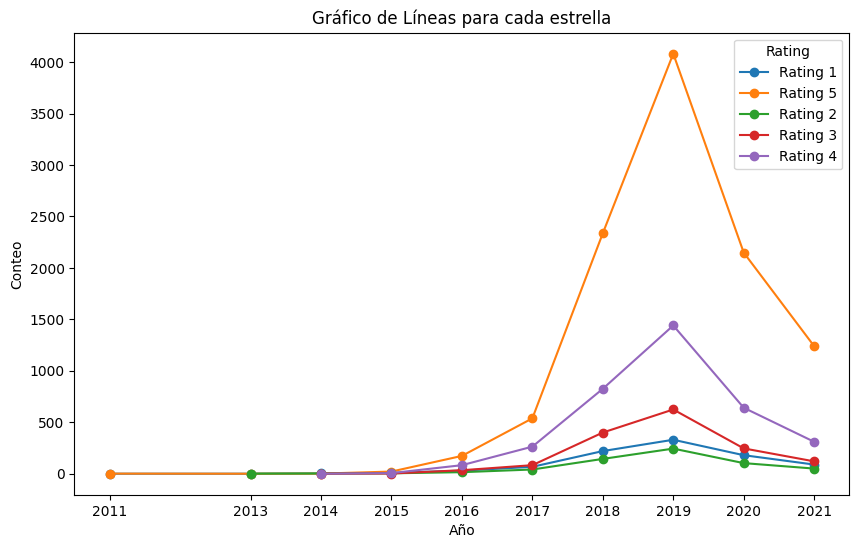

In [22]:
import matplotlib.pyplot as plt

# Convertir la columna 'año' a tipo categórico
dfreviews_ulta_beauty_conteo['año'] = pd.Categorical(dfreviews_ulta_beauty_conteo['año'])

# Elegir todos los años para mostrarlos en el eje x:
años_a_mostrar = dfreviews_ulta_beauty_conteo['año'].cat.categories

plt.figure(figsize=(10, 6))  # Ajustar el tamaño según sea necesario

# Iterar sobre los valores únicos de la columna 'rating'
for rating_value in dfreviews_ulta_beauty_conteo['rating'].unique():
    # Filtrar el DataFrame para el valor de rating actual
    rating_dfreviews_ulta_beauty_conteo = dfreviews_ulta_beauty_conteo[dfreviews_ulta_beauty_conteo['rating'] == rating_value]
    
    # Trazar la línea para el rating actual
    plt.plot(rating_dfreviews_ulta_beauty_conteo['año'], rating_dfreviews_ulta_beauty_conteo['name'], marker='o', label=f'Rating {rating_value}')

# Añadir leyendas y etiquetas
plt.legend(title='Rating')
plt.xlabel('Año')
plt.ylabel('Conteo')
plt.title('Gráfico de Líneas para cada estrella')

# Establecer los valores que se veran en el eje x:
plt.xticks(años_a_mostrar)

# Mostrar el gráfico
plt.show()